# Customer analysis

In [1]:
# Project of customer analysis point is to find patterns 
# for customers with children/teens in home to provide more efficient advertising and marketing
# data source:
# https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?resource=download)

## EDA

In [2]:
#import of libraries

import os

#data manipulation
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import colors
import plotly.express as px

#data export and prezentation
import esparto as es

#to date manipulations
from datetime import datetime

In [3]:
#uploading dataset

df = pd.read_csv('marketing_campaign.csv', delimiter='\t')

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
#data cleaning

#Dt_customer to date

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')



#creating new column to check for children home
children = df["Kidhome"] + df["Teenhome"]
df.insert(5, 'Children', children)

#grouping customers to single and partners
relationship = df["Marital_Status"].replace({"Married":2, "Together":2, "Absurd":1, "Widow":1, "YOLO":1, "Divorced":1, "Single":1, 'Alone':1})
df.insert(6, 'Relationship', relationship)

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Children,Relationship,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,1,0,0,2012-09-04,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,2,1,1,1,2014-03-08,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,2,0,0,2013-08-21,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,2,1,0,2014-02-10,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,2,1,0,2014-01-19,...,5,0,0,0,0,0,0,3,11,0


In [5]:

#creating new columns - household size
household_size = df["Relationship"] + df["Children"]
df.insert(7, 'Household_size', household_size)


#What age are customers?
current_year = datetime.now().year
age = current_year - df['Year_Birth']

df.insert(2, 'Age', age)

#renaming columns to be more clear
df=df.rename(columns={"MntWines": "Wine","MntFruits":"Fruit","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Volume of purchase
volume = df['Wine'] + df['Fruit'] + df['Meat'] + df['Fish'] + df['Sweets'] + df['Gold']
df.insert(8, 'Purchase_volume', volume)

In [6]:
#drop not needed columns
df = df.drop(["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Marital_Status", "Year_Birth", "Kidhome", "Teenhome", "Z_CostContact", "Z_Revenue"], axis=1)

In [7]:
#checking for nulls
print(df.isnull().sum()) #no significant number of null values can be dropped
df= df.dropna()

ID                      0
Age                     0
Education               0
Income                 24
Children                0
Relationship            0
Purchase_volume         0
Household_size          0
Dt_Customer             0
Recency                 0
Wine                    0
Fruit                   0
Meat                    0
Fish                    0
Sweets                  0
Gold                    0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
Response                0
dtype: int64


In [8]:
df.head()

,ID,Age,Education,Income,Children,Relationship,Purchase_volume,Household_size,Dt_Customer,Recency,...,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,66,Graduation,58138.0,0,1,1617,1,2012-09-04,58,...,172,88,88,3,8,10,4,7,0,1
1,2174,69,Graduation,46344.0,2,1,27,3,2014-03-08,38,...,2,1,6,2,1,1,2,5,0,0
2,4141,58,Graduation,71613.0,0,2,776,2,2013-08-21,26,...,111,21,42,1,8,2,10,4,0,0
3,6182,39,Graduation,26646.0,1,2,53,3,2014-02-10,26,...,10,3,5,2,2,0,4,6,0,0
4,5324,42,PhD,58293.0,1,2,422,3,2014-01-19,94,...,46,27,15,5,5,3,6,5,0,0


# Data Analysis

In [9]:
#Creating page for analysis presentation

page = es.Page(title="Customer analysis")


#Notes and insights

introduction_str = '''Customer analysis is the visualization of chosen data available online: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?resource=download
The dataset was imported, cleaned up and prepared to analise.

Aim of this report is to support getting answer on below questions:
\n -What is the correlation between variables?
\n -What is the purchase volume for customers accordingly to age and children in household?
\n -Does customers with children purchase more online or off-line?
\n -Are customers with children more likely to purchase more and more often?
\n -Are customers with childre more likely to purchase on-line?
'''

credits = """\
<small><i>
Text retrieved from [Kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?resource=download) on 2023-03-18    
</i></small>
"""

In [10]:
#Setting up plotting colors

sns.set(rc={"axes.facecolor":"white","figure.facecolor":"white", "grid.color": "#E5E4E2"})
color_map = colors.ListedColormap(["#FFF5EE", "#FFC0CB", "#FAA0A0", "#A95C68", "#C21E56", "#770737"])
palette = sns.set_palette(["#FFF5EE", "#FFC0CB", "#FAA0A0", "#A95C68", "#C21E56", "#770737"])

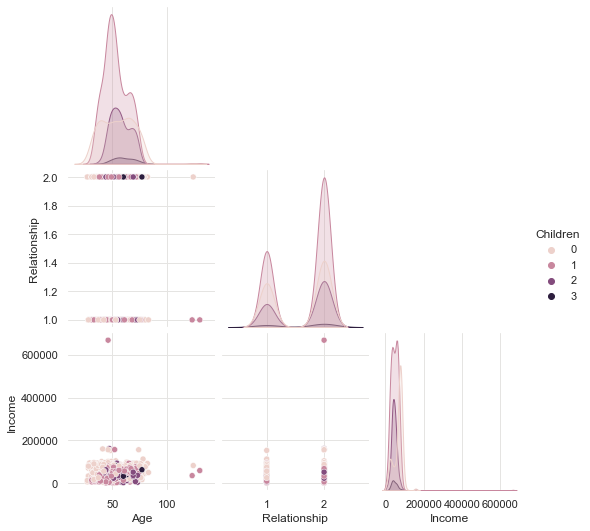

In [11]:
#Plotting first view plots


sns.pairplot(df[['Age', 'Education', 'Relationship', 'Income', 'Children']], hue= "Children", corner=True)

plt.savefig('pairplot.png')

pairplot = 'pairplot.png'

In [12]:
# First insights

insights = """Basing on above plots some first insights can be made. 
The greatest number of customers are around their 50's and have one children. 
More customers are in a relationship. 
Number of customers with one children is visibly higher for those in relationship. 
The difference for 2 kids in household is not so significant. """

<AxesSubplot:>

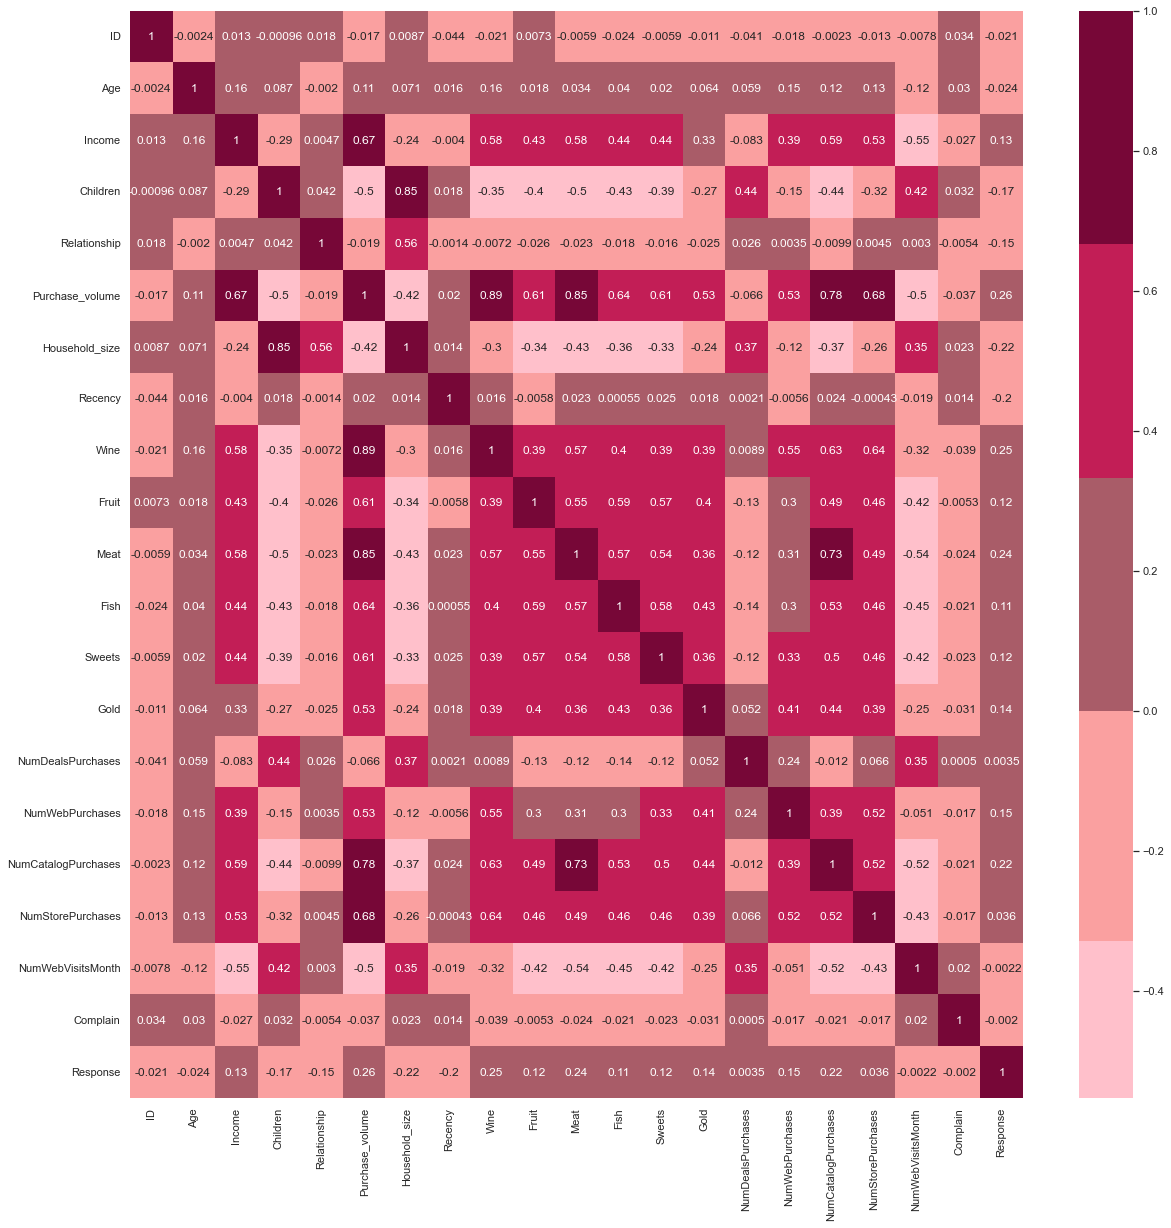

In [13]:
#plotting correlation for columns
corr= df.corr()
fig2, ax = plt.subplots(figsize=(20,20))  

sns.heatmap(corr,annot=True, cmap=color_map, center=0)

In [14]:
page['Introduction'][0] = introduction_str
page['Introduction'][1] = pairplot #pairplot here
page['Introduction'][2] = insights
page['Introduction'][3] = fig2

# Plots based on first analysis

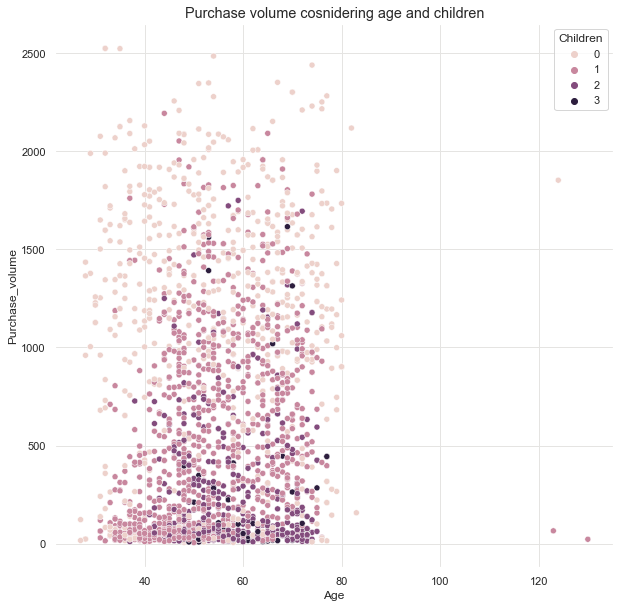

In [15]:
#What is the purchase volume for customers accordingly to age and children in household?
fig3, ax = plt.subplots(figsize=(10,10)) 

sns.scatterplot(x=df['Age'], y=df['Purchase_volume'], hue=df['Children'])
ax.set_title('Purchase volume cosnidering age and children', size='large')
plt.show()

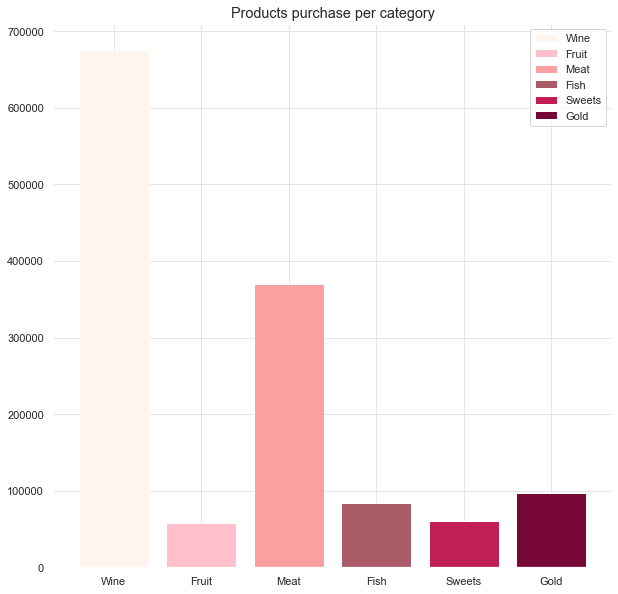

In [16]:
#What products are the most popular?

columns = ['Wine', 'Fruit', 'Meat', 'Fish', 'Sweets', 'Gold']
sum_pur = {}

for col in columns:
    sum_pur[col] = df[col].sum()

#plot the result

fig5, ax = plt.subplots(figsize=(10,10))

for i, col in enumerate(sum_pur):
    ax.bar(col, sum_pur[col], label=col)
        
ax.set_xticks(range(len(columns)))
ax.set_xticklabels(columns)
ax.set_title('Products purchase per category', size='large')
ax.legend()
plt.show()

Text(0.5, 1.0, 'Customers with children shopping online vs off-line')

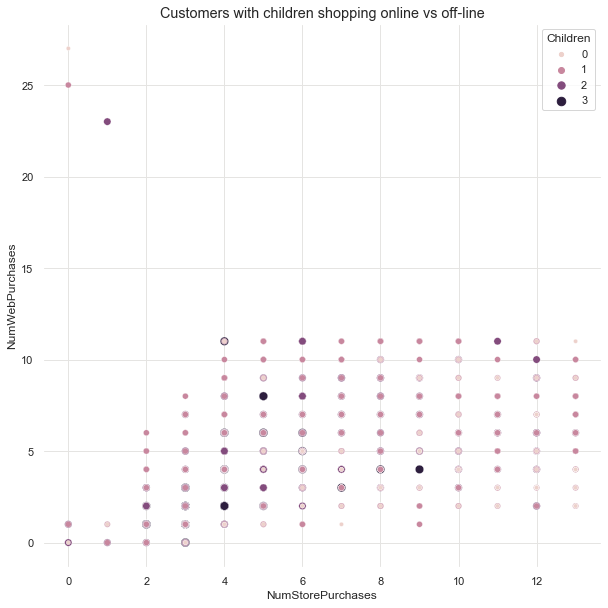

In [17]:
#Does customers with children purchase more online or off-line?
fig4, ax = plt.subplots(figsize=(10,10))  

sns.scatterplot(x=df['NumStorePurchases'], y=df['NumWebPurchases'], hue=df['Children'], size=df['Children'])
ax.set_title('Customers with children shopping online vs off-line', fontsize='large')

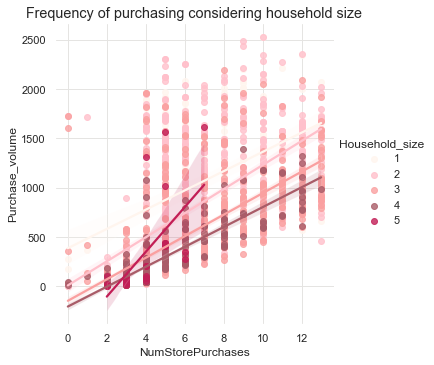

In [18]:
#Are customers with children more likely to purchase more and more often?


sns.lmplot(
    data=df,
    x="NumStorePurchases", y="Purchase_volume", hue="Household_size", 
    height=5, palette=palette
)
plt.title('Frequency of purchasing considering household size', fontsize='large')

plt.savefig('lmplot.png')
        
lmplot = 'lmplot.png'

In [19]:
analysis = """
In this section 4 plots will be presented.
The questions to support first business decisions.
\n -What is the purchase volume for customers accordingly to age and children in household?
\n -Does customers with children purchase more online or off-line?
\n -Are customers with children more likely to purchase more and more often?
"""

In [20]:
insight1 = """ 
From this plot it can be seen that customers age mostly is not greater than 80,
\nbut still in late 60/70ties one or two children are leaving in their house.
\nDespite the fact of household size, purchase volume is in great number of records under 500.
\nWhat is interesting, highest purchase volume is not going in line with number of children (the top of plot is showing customers with 0 children mainly).
\nLast but not least, considering how does this dataset looks like - group of customers with one children are the largest one.
"""
insight2 = """
This chart is confirming last insight from above one - group of customers with one children are the largest one.
\nBasing on this chart and this dataset it is hard to find one pattern of customer shopping habits.
\nIn general it can be said that excluding several outlayers (customers who highly prefer to purchase on-line) customers shop 50/50 online and off-line.
\nNumber of children in this dataset is not visibly affecting shopping preferences.
"""

insight3 = """
Insights from this plot are something I did not expect at all, but the results might be caused by this dataset I am not aware how was collected.
\nWe see that number of children and volume of purchase is in a linear correlation but not the way it might be expected.
\nWhat might see strange - customers with greater number of children are purchasing less and not so often as customers with one or no children.
\nSuch situation might be insight reflecting reality but also it can be 
"""
insight4 = """
This plot prezents how much of each product was purchased in this database. What was not expected, wine is leading category
\nof all recorded purchase. Second one is meat, both sweets and fruits on the same level and last position.
\nThis kind of output might suggest that this store is dedicated to some specific product group or it might be kind of "corner shop",
\nthat is utilized mostly for small shoping for products that are needed "right now".
\nInformation about the metrics are not available, so that volume of purchase is not giving any actual and meaningfull data.
\To ptoceed with better insights data enrichment should be considered.
"""
summary = """
Taking into consideration size of the dataset for more valuable insights I would consider if another dataset should be analyzed.
\nWe can see some patterns and relations, but due to fact insights are not matching intuition I would consider how can we improve this dataset and analysis.
\nI can sum up that cocnlusions that after taking a look on charts might be correct, but in my mind, those should not be driving business.
\nAll in all - this analysis might be a good start for further analysis and data collection.
"""

In [21]:
page['Analysis'][0] = analysis
page['Analysis'][1] = fig3
page['Analysis'][2] = insight1
page['Analysis'][3] = fig5
page['Analysis'][4] = insight4
page['Analysis'][5] = fig4
page['Analysis'][6] = insight2
page['Analysis'][7] = lmplot
page['Analysis'][8] = insight3
page['Analysis'][9] = summary

In [26]:

page.save_html("customer_analysys_report.html")
